<a href="https://colab.research.google.com/github/andreidm92/computer_vision_tasks/blob/main/Object_Detection_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚 Теория: Object Detection

**Object Detection** — задача, где нужно не просто определить, что изображено на фото, но и найти точное положение объекта с помощью прямоугольника (**bounding box**).

| Модель | Описание | Примеры |
|:---|:---|:---|
| **YOLO** | Быстрая детекция за один проход. | YOLOv5, YOLOv8 |
| **Faster R-CNN** | Двухэтапная детекция с Region Proposal Network. | Исследования |
| **SSD** | Одноэтапная детекция, хорошее качество. | SSD300 |
| **DETR** | Модель на основе трансформеров, anchor-free. | DETR |

**Anchor-based vs Anchor-free**:
- Anchor-based: используют заготовки прямоугольников (YOLOv3, Faster R-CNN).
- Anchor-free: предсказывают координаты напрямую (DETR, CenterNet).


In [1]:
# Установка необходимых библиотек
!pip install opencv-python matplotlib


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Загрузка изображения
uploaded = files.upload()

for fn in uploaded.keys():
    image_path = fn
    print('Файл загружен:', image_path)


Saving monkey.jpeg to monkey.jpeg
Файл загружен: monkey.jpeg


In [15]:
# Чтение изображения
image = cv2.imread(image_path)
if image is None:
    raise ValueError('Не удалось загрузить изображение. Проверьте путь.')

# Перевод изображения в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Фильтрация: Размытие ---
blurred = cv2.GaussianBlur(image_rgb, (7, 7), 0)

# --- Поворот изображения на 30 градусов ---
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
# cv2.getRotationMatrix2D(center, angle, scale)
M = cv2.getRotationMatrix2D(center, 30, 1.0)
rotated = cv2.warpAffine(image_rgb, M, (w, h))

# --- Масштабирование изображения в 4 раза меньше ---
#scaled = cv2.resize(image_rgb, (w // 2, h // 2))
scaled = cv2.resize(image_rgb, None, fx=0.25, fy=0.25)


In [16]:
print('Original size:', image_rgb.shape)
print('Scaled size:', scaled.shape)


Original size: (562, 1000, 3)
Scaled size: (140, 250, 3)


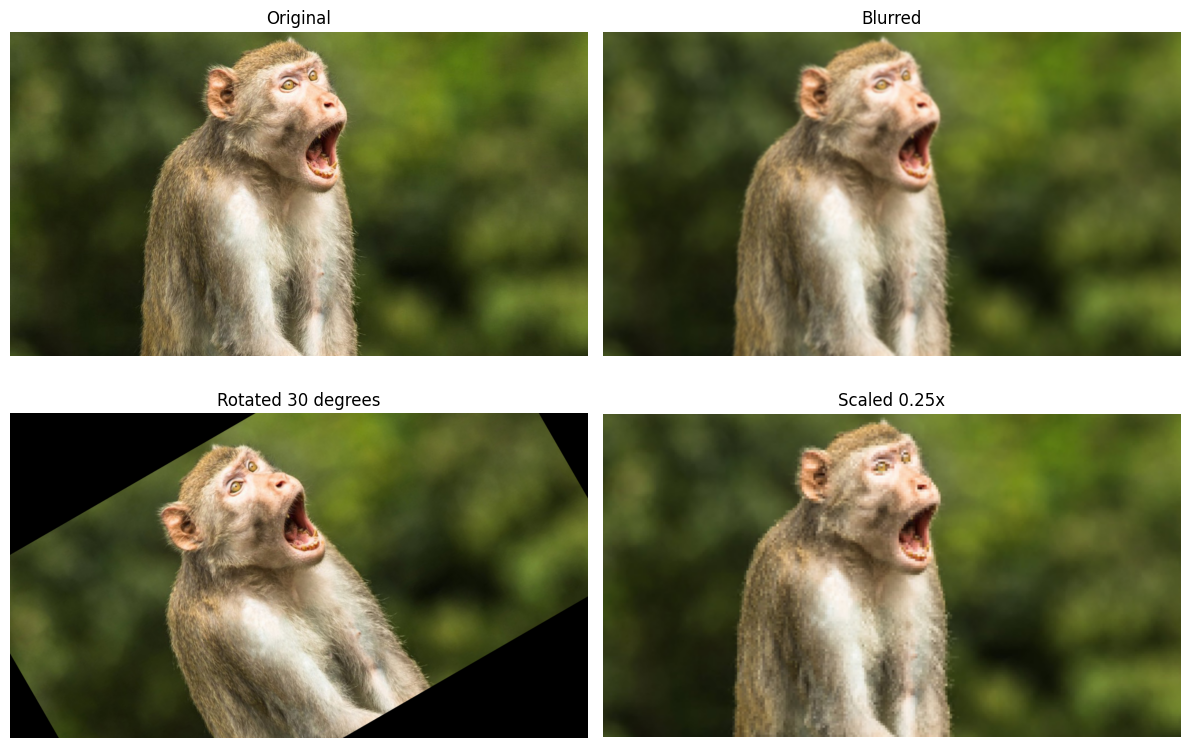

In [17]:
# Визуализация изображений
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Blurred')
plt.imshow(blurred)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Rotated 30 degrees')
plt.imshow(rotated)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Scaled 0.25x')
plt.imshow(scaled)
plt.axis('off')

plt.tight_layout()
plt.show()


## 📚 Линейная алгебра: Матрицы трансформаций

В компьютерном зрении часто используются **матрицы**, чтобы описывать базовые преобразования изображений.

---

### 🔵 Матрица поворота

Поворот точки (x, y) на угол θ против часовой стрелки:

\[
\begin{pmatrix} x' \\ y' \end{pmatrix} =
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
\]

**Пример:**  
Поворот на 90°:

\[
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\]

---

### 🟠 Матрица масштабирования

Масштабирование по осям X и Y:

\[
\begin{pmatrix} x' \\ y' \end{pmatrix} =
\begin{pmatrix}
s_x & 0 \\
0 & s_y
\end{pmatrix}
\begin{pmatrix} x \\ y \end{pmatrix}
\]

где \(s_x\) и \(s_y\) — коэффициенты масштабирования по осям X и Y.

**Пример:**  
Увеличение в 2 раза:

\[
\begin{pmatrix}
2 & 0 \\
0 & 2
\end{pmatrix}
\]

---

### 🟢 Матрица трансляции (сдвига)

Сдвиг точки на вектор \((t_x, t_y)\) записывается в гомогенных координатах:

\[
\begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{pmatrix}
\begin{pmatrix} x \\ y \\ 1 \end{pmatrix}
\]

---

### ✏️ Пример:

Пусть точка \((2, 3)\).  
Поворот на 90° против часовой стрелки:

\[
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix} 2 \\ 3 \end{pmatrix}
=
\begin{pmatrix} -3 \\ 2 \end{pmatrix}
\]

**Результат**
